## Perform exploratory data analysis (EDA).

## Step 01 import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 02  Download a dataset from Kaggle and read it using Pandas (pd)

In [2]:


df = pd.read_csv("titanic.csv")


## Step 03 Explore Data

In [3]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [5]:
df.dtypes

Unnamed: 0       int64
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df.shape

(891, 16)

In [8]:
df.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Step 04 Check Null Values

In [9]:
df.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Step 05 Percentage of null values

In [10]:
(df.isnull().sum() / len(df) )* 100

Unnamed: 0      0.000000
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

## Step 06 Manage Null Values Based on their strategy

In [11]:
df1 = df.copy()

In [12]:
# removed deck because it have more than 70 % null values and it cause error in perdiction
df1 = df1.drop(columns=["deck"])

In [13]:
df1 = df1.drop(columns=["Unnamed: 0"])

In [14]:
df1.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [15]:
# replace nulll values of embaked town with mode of it self 
df1["embark_town"] = df1["embark_town"].fillna(df1["embark_town"].mode()[0])


In [16]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [17]:
# Replace null values of embarked with mode of it self because embarked have catagorical data

df1["embarked"] = df1["embarked"].fillna(df1["embarked"].mode()[0])

In [18]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [19]:
df1["age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [20]:
df1["age"].mean()

np.float64(29.69911764705882)

In [21]:
# Replace null values of age with mean of it self column

df1["age"] = df1["age"].fillna(df1["age"].mean())

In [22]:
# all values are fill no one column value is empty
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Step 07 Visualization

<Axes: xlabel='sex', ylabel='survived'>

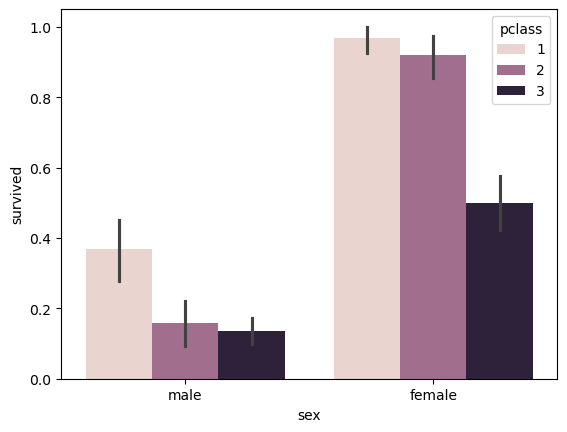

In [23]:
sns.barplot(data=df1 ,  x = "sex"  , y = "survived" , hue="pclass")

<Axes: xlabel='survived', ylabel='count'>

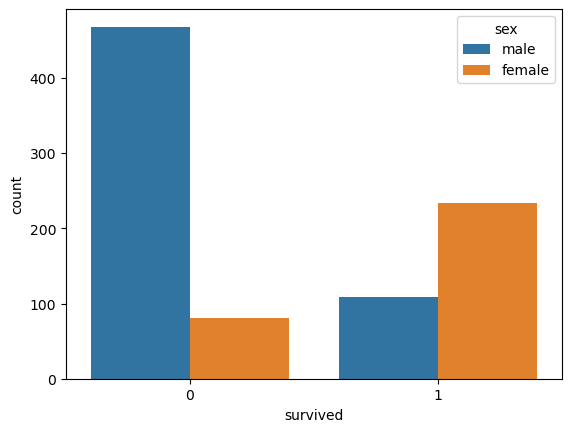

In [24]:
sns.countplot(data=df1 , x="survived" , hue="sex")

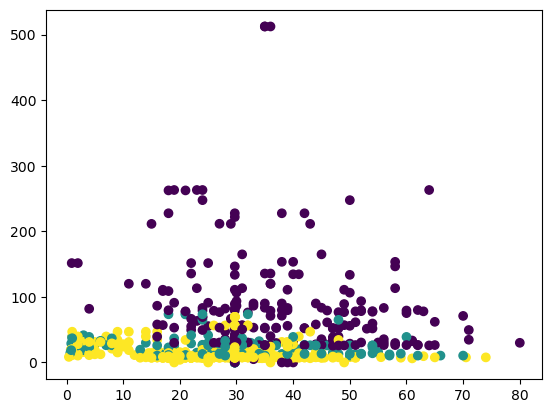

In [25]:
plt.scatter(data=df1, x="age" , y="fare" , c="pclass")

<Axes: xlabel='age', ylabel='fare'>

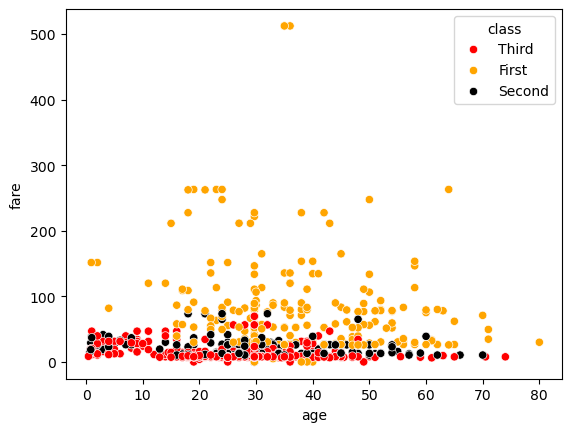

In [26]:
sns.scatterplot(data=df1 , x="age" , y="fare" , hue="class" , palette=["red" , "orange" , "black"])

<Axes: xlabel='sex', ylabel='fare'>

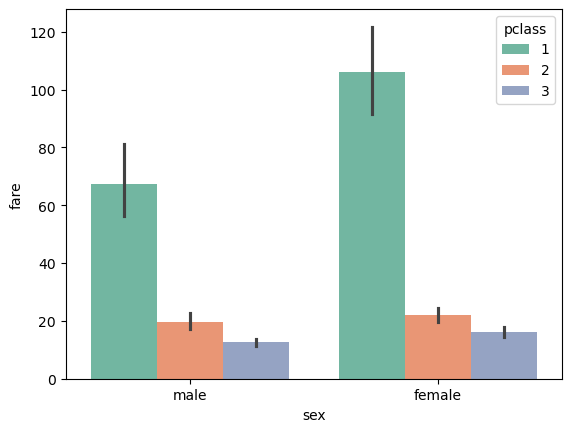

In [27]:

 
sns.barplot( data = df1 , x = "sex" , y = "fare" , hue = "pclass" , palette = "Set2")

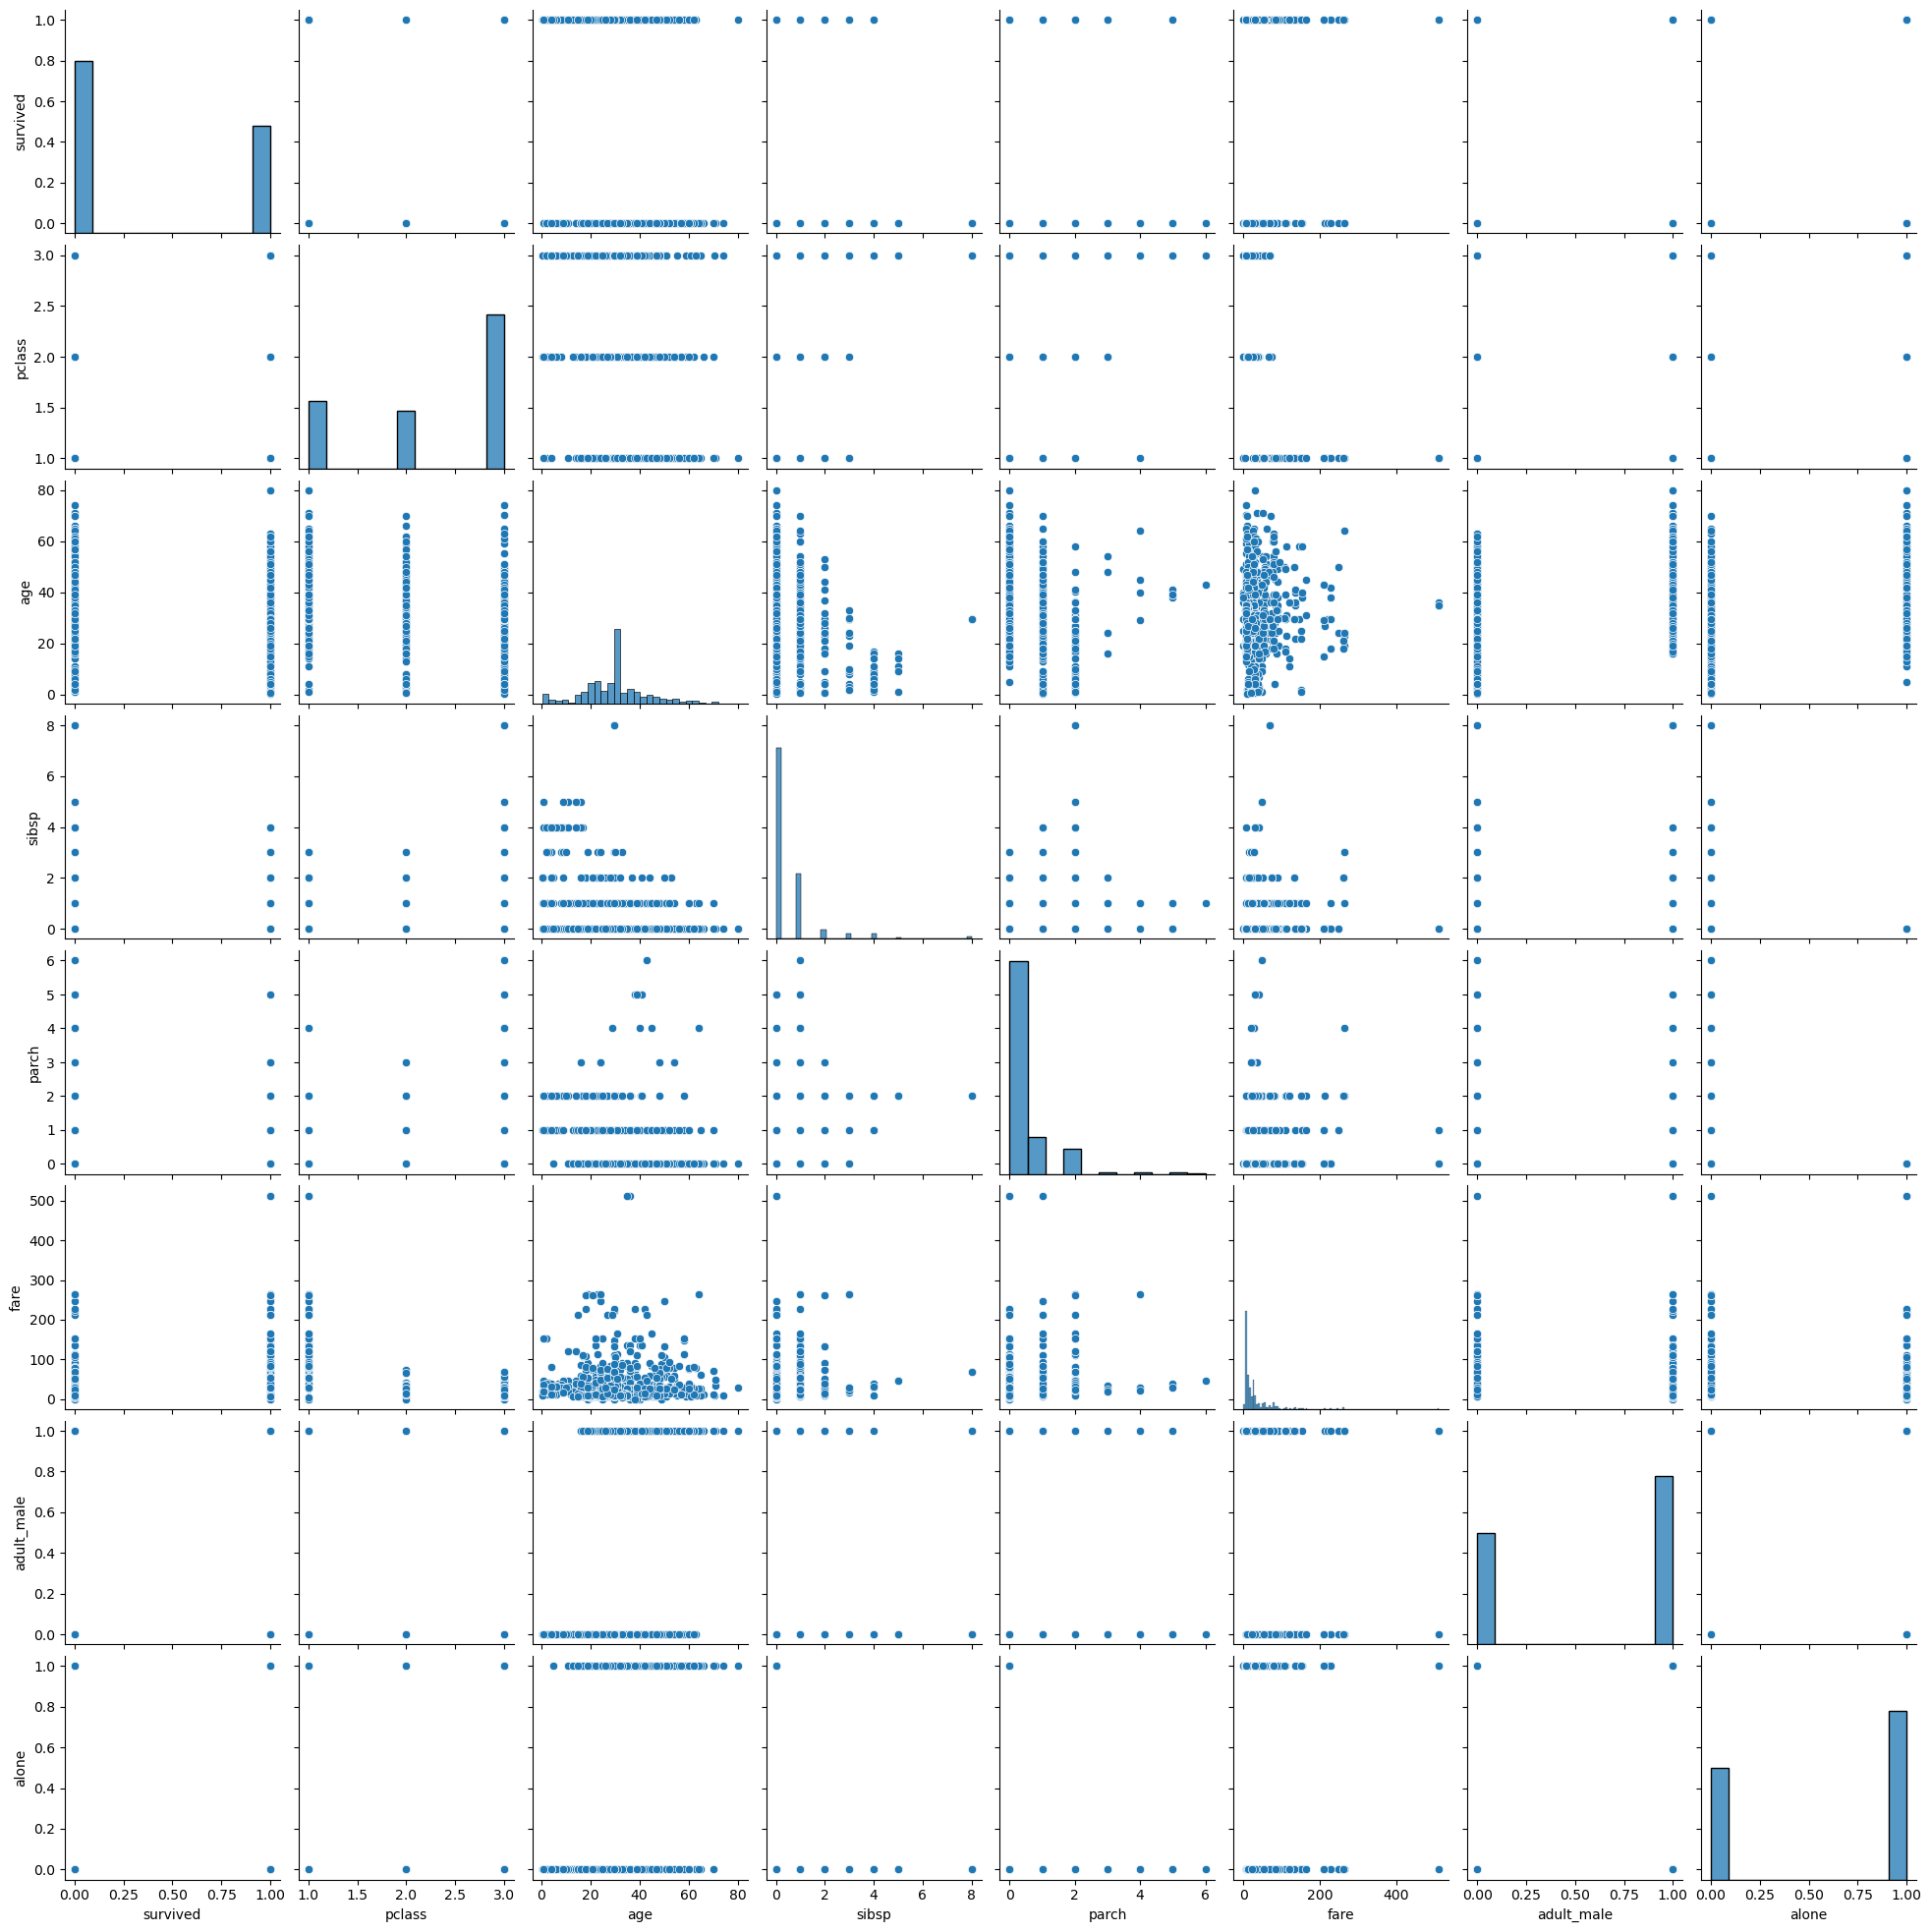

In [28]:
sns.pairplot(df1)

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

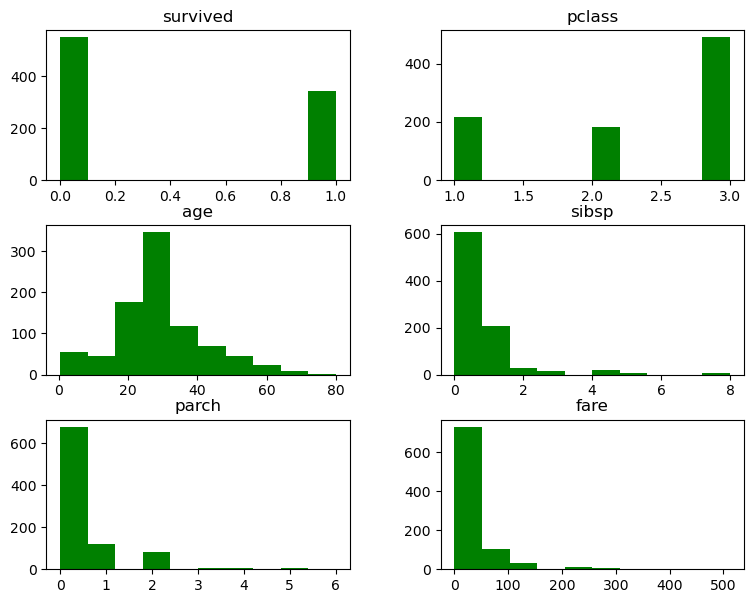

In [29]:
df1.hist(bins=10 , figsize=(9,7) , grid=False , color = "green")

<Axes: xlabel='sex', ylabel='age'>

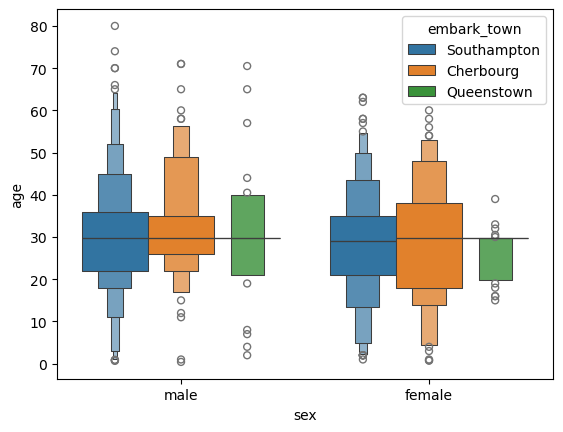

In [30]:
sns.boxenplot(data=df1 , x="sex" , y="age" , hue="embark_town" )

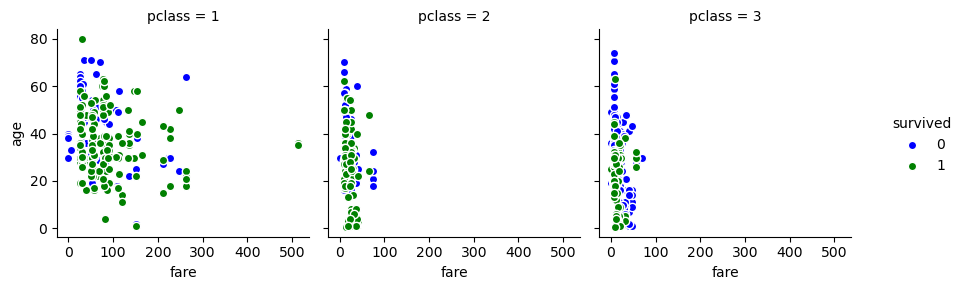

In [31]:


a = sns.FacetGrid(df1 , hue="survived" , col="pclass" , margin_titles=True ,
                  palette={0:"blue" , 1: "green" })
a = a.map(plt.scatter  , "fare" , "age" , edgecolor = "w").add_legend()

<Axes: xlabel='sex', ylabel='fare'>

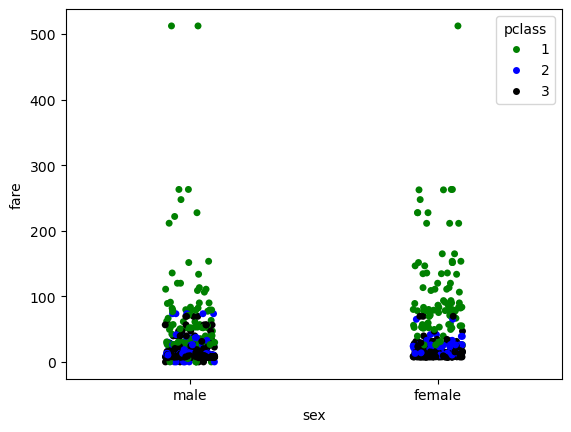

In [32]:
# strip plot 

sns.stripplot(data= df1 , x = "sex" , y = "fare" , hue= "pclass" , palette={1 : "green" , 2 : "blue" , 3: "black"})


Text(0.5, 1.0, 'Heat Plot of Titanic Data set ')

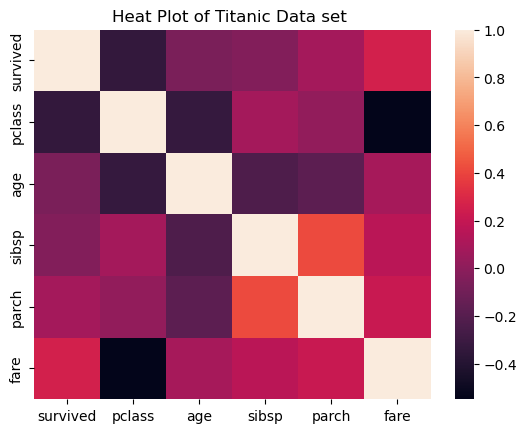

In [33]:
corr = df1.select_dtypes(include=["number"]).corr()
plt.Figure(figsize=(10 , 10))
sns.heatmap(corr)
plt.title("Heat Plot of Titanic Data set ")